In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df=pd.read_csv('/content/titanic_toy.csv')

In [7]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [9]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [12]:
x_tr,x_te,y_tr,y_te=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2)

In [13]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [14]:
mean_age = x_tr['Age'].mean()
med_age=x_tr['Age'].median()

mean_fare=x_tr['Fare'].mean()
med_fare=x_tr['Fare'].median()

In [23]:
x_tr['Age_med']=x_tr['Age'].fillna(med_age)
x_tr['Age_mean']=x_tr['Age'].fillna(mean_age)
x_tr['Fare_med']=x_tr['Fare'].fillna(med_fare)
x_tr['Fare_mean']=x_tr['Fare'].fillna(mean_fare)


In [26]:
x_tr.sample(5)

,Age,Fare,Family,Age_med,Age_mean,Fare_med,Fare_mean
826,NaN,56.4958,0,28.0,29.72689,56.4958,56.495800
848,28.0,33.0000,1,28.0,28.00000,33.0000,33.000000
197,42.0,8.4042,1,42.0,42.00000,8.4042,8.404200
434,50.0,NaN,1,50.0,50.00000,14.4542,32.795422
530,2.0,26.0000,2,2.0,2.00000,26.0000,26.000000


In [27]:
print('Org age var variance',x_tr['Age'].var())
print('after age var variance',x_tr['Age_med'].var())
print('Ahter mean age var variance',x_tr['Age_mean'].var())

Org age var variance 212.72476942868738
after age var variance 169.5296884582569
Ahter mean age var variance 169.0428899116855


In [28]:
print('Org fare var variance',x_tr['Fare'].var())
print('after fare var variance',x_tr['Fare_med'].var())
print('Ahter mean fare var variance',x_tr['Fare_mean'].var())

Org fare var variance 2805.8814517502337
after fare var variance 2690.540527889815
Ahter mean fare var variance 2675.650667069843


In [29]:
x_tr.corr()

,Age,Fare,Family,Age_med,Age_mean,Fare_med,Fare_mean
Age,1.000000,0.097846,-0.283072,1.000000,1.000000,0.095538,0.095691
Fare,0.097846,1.000000,0.220914,0.101004,0.094523,1.000000,1.000000
Family,-0.283072,0.220914,1.000000,-0.222722,-0.224552,0.217259,0.217846
Age_med,1.000000,0.101004,-0.222722,1.000000,0.998563,0.098592,0.098759
Age_mean,1.000000,0.094523,-0.224552,0.998563,1.000000,0.092322,0.092420
Fare_med,0.095538,1.000000,0.217259,0.098592,0.092322,1.000000,0.997229
Fare_mean,0.095691,1.000000,0.217846,0.098759,0.092420,0.997229,1.000000


<Axes: >

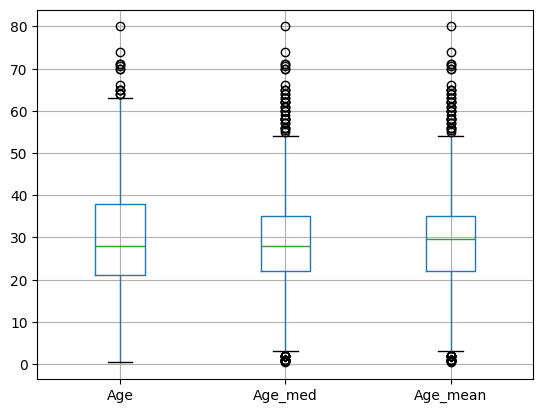

In [32]:
# @title Dont use mean/med for Age
x_tr[['Age','Age_med','Age_mean']].boxplot()

<Axes: >

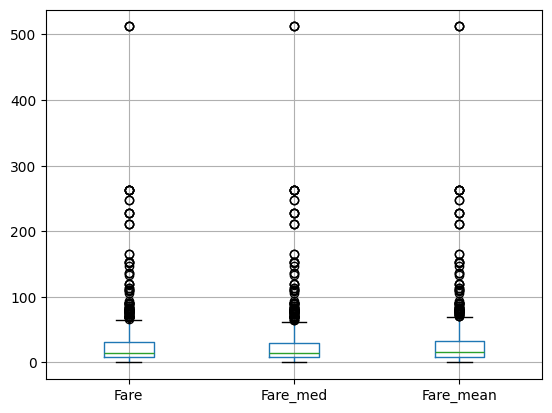

In [31]:
x_tr[['Fare','Fare_med','Fare_mean']].boxplot()

# use sklearn

In [33]:
imp1=SimpleImputer(strategy='mean')
imp2=SimpleImputer(strategy='median')

In [46]:
x_tr1,x_te1,y_tr1,y_te1=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2)

In [36]:
trf=ColumnTransformer([
    ('imp1',imp1,['Age']),
    ('imp2',imp2,['Fare'])],remainder='passthrough')

In [38]:
trf.fit(x_tr)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1', SimpleImputer(), ['Age']),
                                ('imp2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [39]:
trf.named_transformers_['imp1'].statistics_

array([29.72689046])

In [40]:
trf.named_transformers_['imp2'].statistics_

array([14.4542])

In [49]:
x_tr1= trf.fit_transform(x_tr1)
x_te1= trf.transform(x_te1)

In [50]:
x_tr['Age_99']=x_tr['Age'].fillna(99)

In [51]:
x_tr['Fare_minus1']=x_tr['Fare'].fillna(-1)

In [52]:
print('Org age var variance',x_tr['Age'].var())
print('after age var variance',x_tr['Age_99'].var())

Org age var variance 213.14266445632487
after age var variance 945.1981267385302


In [53]:
print('Org age var variance',x_tr['Fare'].var())
print('after age var variance',x_tr['Fare_minus1'].var())

Org age var variance 2309.7268062898574
after age var variance 2245.0549209152887
